In [1]:
import numpy as np
import pandas as pd

In [25]:
class Perceptron:

    def __init__(self,eta=0.01,random_state=1,n_iter=50):
        self.eta = eta
        self.random_state = random_state
        self.n_iter = n_iter
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0,scale=0.01,size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for a,b in zip(X,y):
                update = self.eta*(b-self.predict(a))
                self.w_[1:]+=update*a
                self.w_[0]+=update
                errors+=int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        return np.dot(self.w_[1:].T,X)+self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X)>=0,1,-1)

In [3]:
a = np.random.randint(low=10,high=40,size=(10,2))

In [4]:
a

array([[10, 17],
       [17, 27],
       [32, 19],
       [35, 27],
       [24, 11],
       [25, 15],
       [22, 24],
       [26, 33],
       [22, 11],
       [14, 18]])

In [10]:
b = a[:,0]*2-a[:,1]*2

In [11]:
df = pd.DataFrame(a,columns=['x1','x2'])

In [12]:
tars = pd.Series(b)

In [13]:
df['target'] = tars

In [14]:
df

,x1,x2,target
0,10,17,-14
1,17,27,-20
2,32,19,26
3,35,27,16
4,24,11,26
5,25,15,20
6,22,24,-4
7,26,33,-14
8,22,11,22
9,14,18,-8


In [15]:
df['target']=df['target']>0

In [16]:
df['target']=df['target'].map({True:1,False:-1})

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='x1', ylabel='x2'>

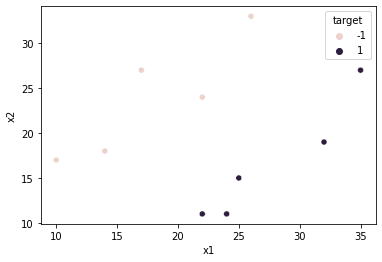

In [18]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['target'])

In [19]:
# x1*2 - x2*2 >0 ==> 1 else -1
df

,x1,x2,target
0,10,17,-1
1,17,27,-1
2,32,19,1
3,35,27,1
4,24,11,1
5,25,15,1
6,22,24,-1
7,26,33,-1
8,22,11,1
9,14,18,-1


In [26]:
pc = Perceptron()
pc.fit(X=df[['x1','x2']].values,y=df['target'].values)
pc.w_

array([ 0.01624345,  0.73388244, -0.72528172])

In [27]:
def plot_decison_region(X,y,classifier,resolution=0.02):
    markers = ('x','o')
    colors = ('red','blue')
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],edgecolors='black')


C:\Users\SATHYA~1\AppData\Local\Temp/ipykernel_8420/4121545489.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],edgecolors='black')


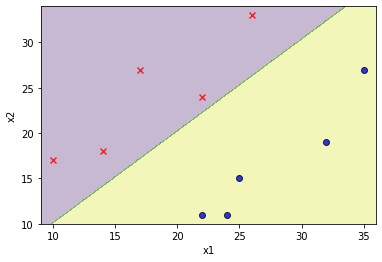

In [31]:
plot_decison_region(X = df[['x1','x2']].values,y=df['target'].values,classifier=pc)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('perc');